In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import os

notebook_path = os.path.abspath('')
import sys
# Find the part of the path that contains 'commitFit'
commit_fit_path = None
for part in notebook_path.split(os.sep):
    print(part)
    if 'ensemble_commit' in part:
        commit_fit_path = notebook_path.split(part)[0] + part
        print(commit_fit_path)
        break

if commit_fit_path is None:
    raise ValueError("Path containing 'ensemble_commit' not found in notebook path.")


if commit_fit_path not in sys.path:
    sys.path.append(commit_fit_path)

import ensemble_model.preprocesser as preprocesser 
import ensemble_model.MoE_model_focal_cum_loss as moe 
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer, DistilBertModel

# import whatthepatch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve,classification_report



root
ensemble_commit
/root/ensemble_commit


In [2]:
# moe.BiLSTMStudent

In [3]:
df = pd.read_csv(r'../datasets/dataset.csv', encoding='utf_8_sig')
df.dropna(inplace=True)
label2id={'negative':0,'positive':1}
df = df.replace({"label": label2id})
df

/tmp/ipykernel_2105/1052552286.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"label": label2id})


,Unnamed: 0,label,message,diff
0,0,0,Merge pull request #46 from rufferson/saslx-tl...,diff --git a/lib/DJabberd.pm b/lib/DJabberd.pm...
1,1,1,Fix leaks in kadmin server stubs [CVE-2015-863...,diff --git a/src/kadmin/server/server_stubs.c ...
2,2,1,Validate authorization request on approval\n\n...,diff --git a/spring-security-oauth2/src/main/j...
3,3,1,Release 2.72.4+171110,diff --git a/application/config/version.php b/...
4,4,0,Fixing compiler warnings.,diff --git a/src/main.c b/src/main.c\nindex 50...
...,...,...,...,...
10107,10107,0,les: remove useless protocol defines (#22115)\...,diff --git a/les/benchmark.go b/les/benchmark....
10108,10108,1,Merge pull request #2067 from realm/tg-swift-l...,diff --git a/CHANGELOG.md b/CHANGELOG.md\ninde...
10109,10109,0,[fix] 新規アカウント作成ページの翻訳を修正,diff --git a/app/locales/ja_JP/LC_MESSAGES/mes...
10110,10110,0,Merge branch 'hotfixes',diff --git a/CHANGELOG.txt b/CHANGELOG.txt\nin...


In [4]:
# df_dataset[0]

In [5]:
train_data, _ = train_test_split(df, train_size=0.35, random_state=42)
train_data, test_data = train_test_split(train_data, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(test_data, train_size=0.5, random_state=42)

train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

In [6]:
# train_data['category'].value_counts()

In [7]:
val_data

,index,Unnamed: 0,label,message,diff
0,5106,5106,0,Merge pull request #6 from daniel-beck-bot/htt...,diff --git a/pom.xml b/pom.xml\nindex 661ce51....
1,3322,3322,0,Fix Gitter badge,diff --git a/README.md b/README.md\nindex eff9...
2,3187,3187,1,Check for presence of crsf in admin scripts,diff --git a/src/Lua.cpp b/src/Lua.cpp\nindex ...
3,8592,8592,0,Fixed link errors,diff --git a/src/irisnet/CMakeLists.txt b/src/...
4,7272,7272,0,Fixed memory corruption introduced when creati...,diff --git a/Doxyfile b/Doxyfile\nindex f88538...
...,...,...,...,...,...
524,1500,1500,0,...,diff --git a/config/policy.xml b/config/policy...
525,1141,1141,0,SONY: added ImageCount3,diff --git a/dcraw/dcraw.c b/dcraw/dcraw.c\nin...
526,2921,2921,1,Fix bug #68942 (Use after free vulnerability i...,diff --git a/NEWS b/NEWS\nindex 0d93c47b02007....
527,8292,8292,0,先把 zbpimage 和 thumb 改成 thumbnail,diff --git a/zb_system/function/c_system_event...


In [8]:
# val_data

In [9]:
# Load BERT and CodeBERT models and tokenizers
bert_model = BertModel.from_pretrained('../models/bert-base-cased')
bert_tokenizer = BertTokenizer.from_pretrained('../models/bert-base-cased')

codebert_model = BertModel.from_pretrained('../models/bert-base-cased')
codebert_tokenizer = BertTokenizer.from_pretrained('../models/bert-base-cased')

Some weights of the model checkpoint at ../models/bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at ../models/bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 

In [10]:


# Create Datasets and DataLoaders
train_dataset = preprocesser.SentencePairDataset(train_data, bert_tokenizer, codebert_tokenizer, message='message',command='diff',label='label')
val_dataset = preprocesser.SentencePairDataset(val_data, bert_tokenizer, codebert_tokenizer, message='message',command='diff',label='label')
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer, message='message',command='diff',label='label')

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)



# # Initialize the model
# model = em.CombinedModel(bert_model, codebert_model, bert_tokenizer, codebert_tokenizer)

# # Train the model
# model.trainer(train_loader, val_loader,num_epochs=10)
# for batch in train_loader:
#     print(batch)

In [11]:
moe_model = torch.load("focal_cum_entire_bert_model_900repo.pth")                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Validation Accuracy: 0.8826
Precision: 0.8819
Recall: 0.8826
F1-Score: 0.8820


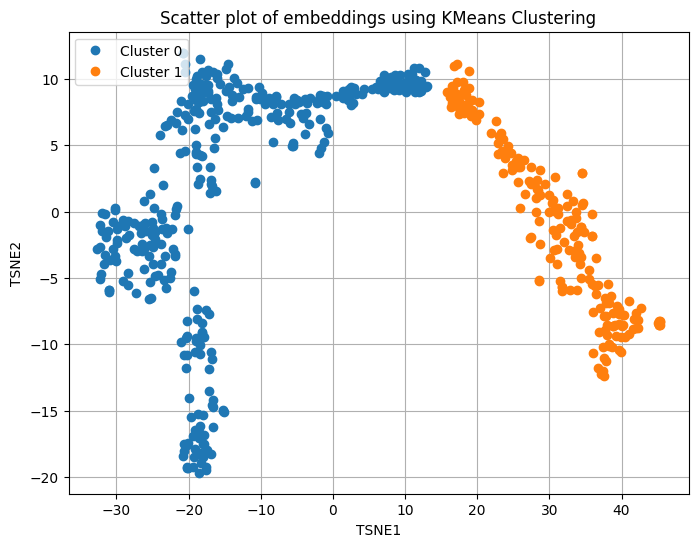

<Figure size 640x480 with 0 Axes>

In [12]:
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = moe_model.evaluate(test_loader)

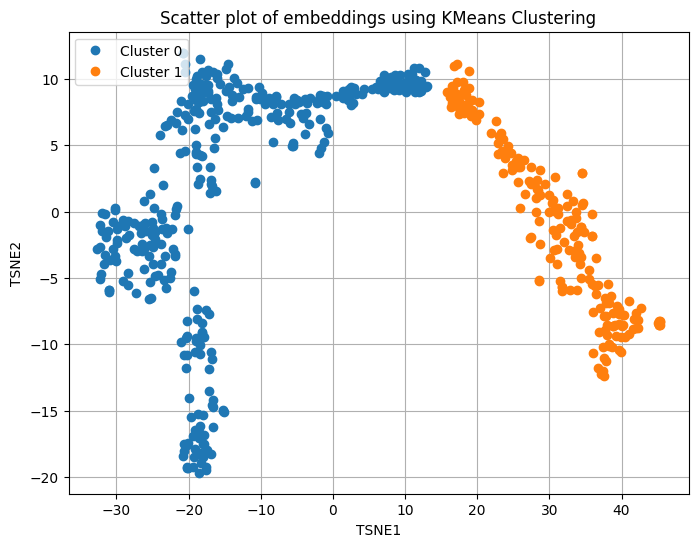

<Figure size 640x480 with 0 Axes>

In [13]:
moe_model.plot_tsne(test_embeddings,test_labels)

In [14]:
# torch.save(moe_model, "focal_cum_entire_bert_model.pth")

In [15]:
# test_data['category'].unique()

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix on Dataset I', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    # plt.xlabel('Predicted label')
    plt.tight_layout()

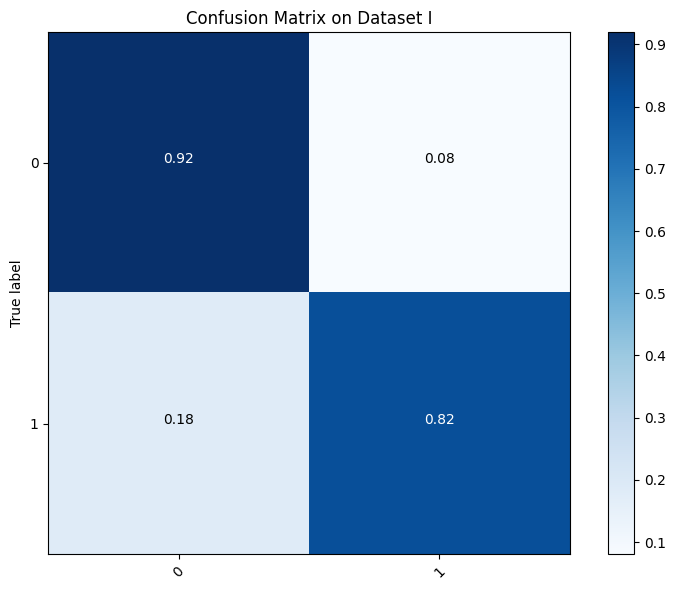

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictions)

# Call the function to plot the confusion matrix
class_names = test_data['label'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages

Validation Accuracy: 0.8769
Precision: 0.8761
Recall: 0.8769
F1-Score: 0.8761


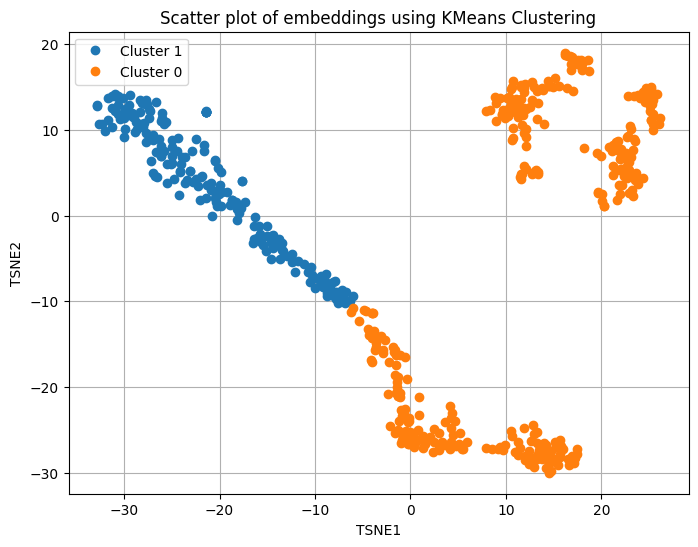

<Figure size 640x480 with 0 Axes>

In [18]:
moe_model = torch.load("focal_entire_bert_model_900repo.pth")                    
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = moe_model.evaluate(test_loader)

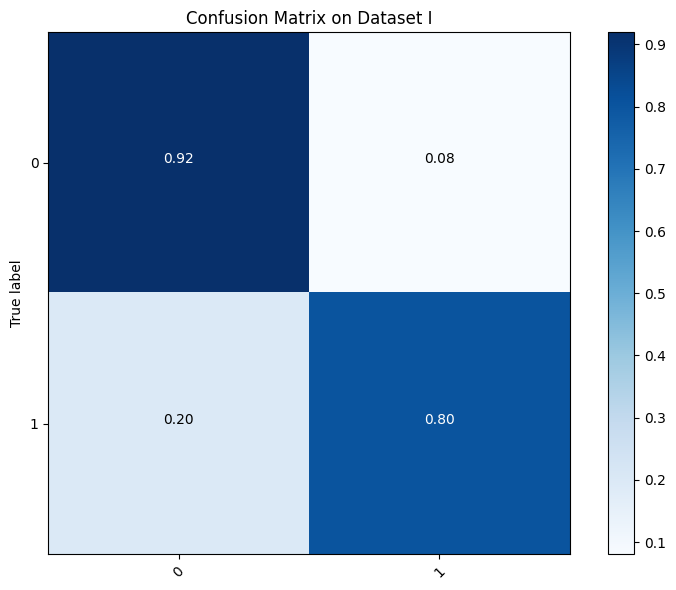

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictions)

# Call the function to plot the confusion matrix
class_names = test_data['label'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages

Validation Accuracy: 0.8693
Precision: 0.8698
Recall: 0.8693
F1-Score: 0.8695


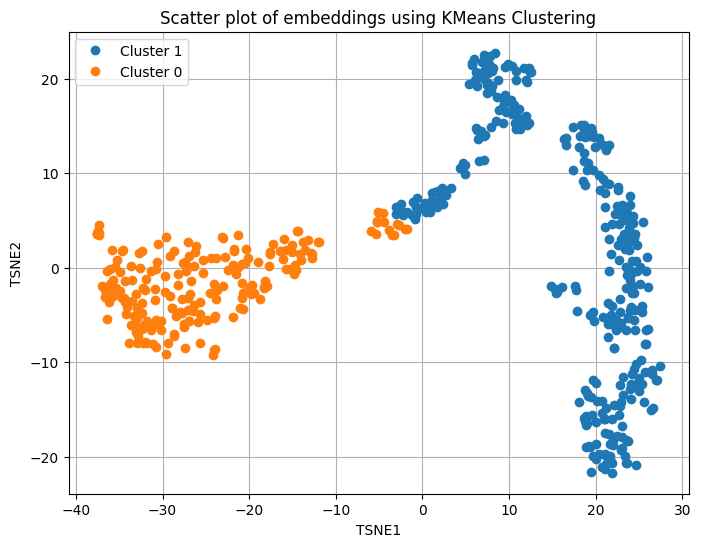

<Figure size 640x480 with 0 Axes>

In [20]:
moe_model = torch.load("CE_entire_bert_model_900repo.pth")                    
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = moe_model.evaluate(test_loader)

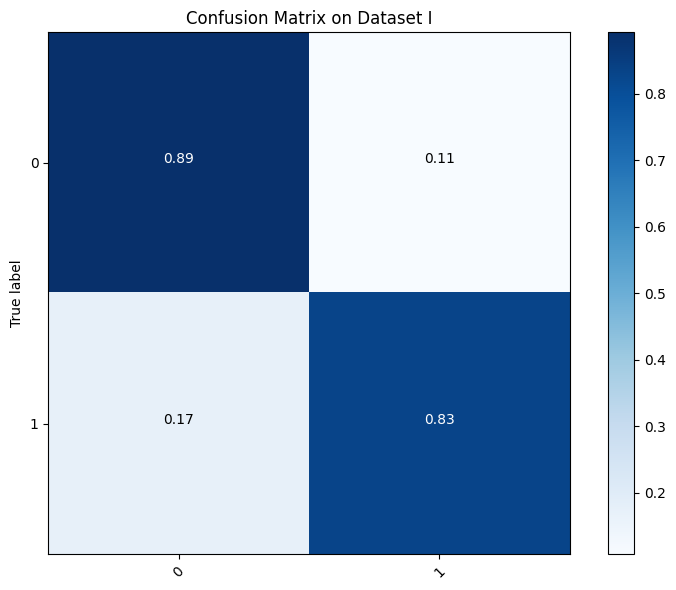

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictions)

# Call the function to plot the confusion matrix
class_names = test_data['label'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages

Validation Accuracy: 0.8807
Precision: 0.8811
Recall: 0.8807
F1-Score: 0.8787


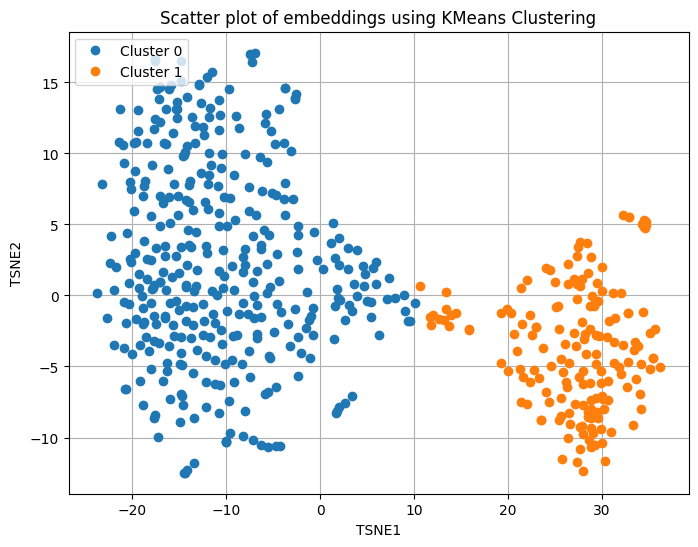

<Figure size 640x480 with 0 Axes>

In [22]:
moe_model = torch.load("smooth_entire_bert_model_900repo.pth")                    
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = moe_model.evaluate(test_loader)

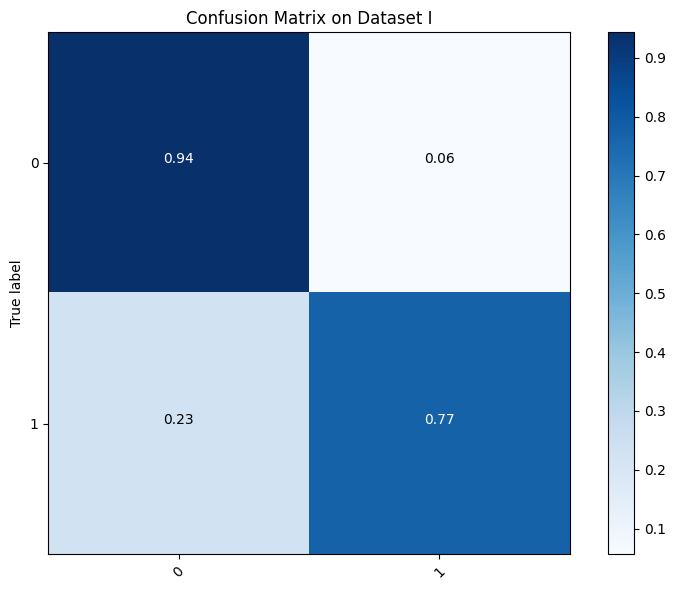

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictions)

# Call the function to plot the confusion matrix
class_names = test_data['label'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages

Validation Accuracy: 0.8485
Precision: 0.8607
Recall: 0.8485
F1-Score: 0.8506


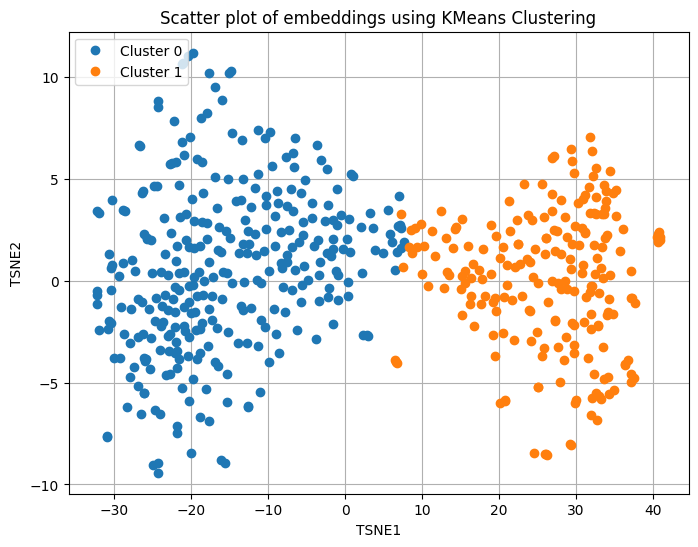

<Figure size 640x480 with 0 Axes>

In [11]:
moe_model = torch.load("smooth_cum_entire_bert_model_900repo.pth")                    
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = moe_model.evaluate(test_loader)

In [12]:
print(classification_report(test_labels,test_predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9264    0.8269    0.8738       335
           1     0.7467    0.8860    0.8104       193

    accuracy                         0.8485       528
   macro avg     0.8366    0.8564    0.8421       528
weighted avg     0.8607    0.8485    0.8506       528



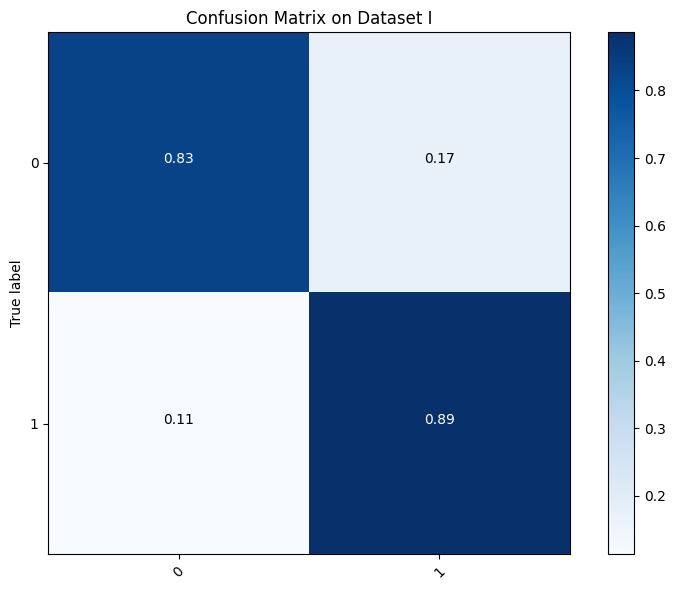

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictions)

# Call the function to plot the confusion matrix
class_names = test_data['label'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages